#### Introduction

When it comes to traveling to a new city or country, finding suitable accommodation is a common challenge. One of the most important factors in choosing accommodation is the reservation price. Understanding the main factors that influence reservation prices can help us make informed decisions and potentially save money. Fortunately, publicly accessible Airbnb data, available on platforms like Inside Airbnb and Kaggle, allows us to analyze and gain insights into reservation prices.

#### Initial Insights

Before delving into the data analysis, let's gather some general information about how reservation prices are determined and discover useful facts for our future analysis.

According to Airbnb's official website, the reservation price is based on several costs, including:

1. Costs determined by the host:
   - Nightly price: The rate set by the host for each night of stay.
   - Cleaning fee: A one-time fee charged by some hosts to cover the cost of cleaning the space.
   - Extra guest fees: A one-time fee charged by some hosts to cover additional costs related to accommodating extra guests.

2. Costs determined by Airbnb:
   - Airbnb service fee: A fee charged by Airbnb for providing their platform and services.

3. Other potential costs:
   - Currency exchange fees, VAT, and other local taxes, which may vary depending on the location.


Based on our analysis, we can consider the following factors that influence reservation prices:

1. Time of the year: The timing of the reservation can have an impact on the price, with certain periods potentially being more expensive or in high demand. (as shown in the other notebook)
2. Amenities offered: Amenities such as Wi-Fi and TV provided by hosts can influence the price, as they add value to the guest experience.


By examining these factors and analyzing the available Airbnb data, we can gain insights into reservation prices, identify busy periods throughout the year, and potentially find strategies to optimize our own reservations and save money.

In [38]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as offline
from tabulate import tabulate
import numpy.ma as ma

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

calendar_df = pd.read_csv("calendar.csv")
listings_df = pd.read_csv("listings.csv")

## Exploring the listings_df dataset

- What are the most common types of properties listed on Airbnb?
- How does the availability of listings change over time?
- What is the average price of listings in different neighborhoods?
- Are there any specific amenities that are commonly offered in Airbnb listings?
- What is the distribution of review scores for the listed properties?
- Is there a correlation between the number of reviews and the overall rating of a listing?
- Are there any seasonal patterns in the pricing of listings?
- Which hosts have the highest number of listings?
- What are the most frequent cancellation policies chosen by hosts?
- Are there any correlations between the number of bedrooms, bathrooms, and the price of a listing?
- What is the distribution of property sizes (in terms of square feet) among the listings?
- How many listings have missing values for important attributes like description or review scores?
- How many listings have a minimum stay requirement of more than a certain number of nights?
- Are there any differences in review scores based on the instant bookability of a listing?
- Can we identify any outliers or unusual patterns in the data, such as extremely high prices or low review scores?

In [39]:
import matplotlib.pyplot as plt
listings_df.head()


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
listings_df.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,...,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,...,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,...,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,...,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,...,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,...,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,...,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,...,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,...,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [4]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

### Removing null columns


<Axes: title={'center': 'Missing values per column, %'}>

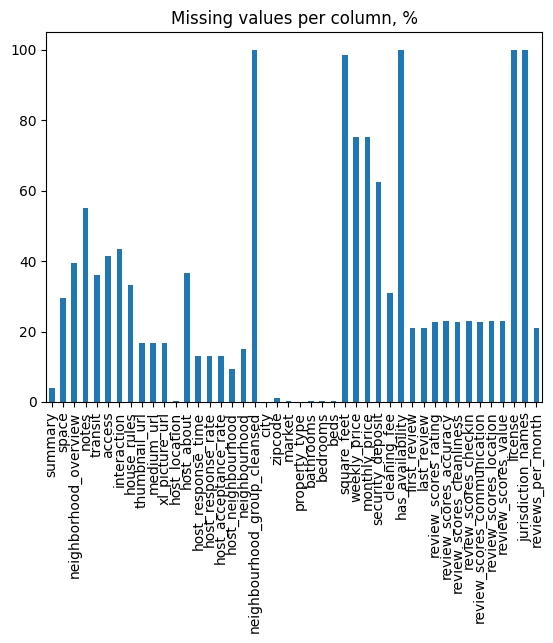

In [40]:
#find percentage of missing values for each column
listings_missing_df = listings_df.isnull().mean()*100

#filter out only columns, which have missing values
listings_columns_with_nan = listings_missing_df[listings_missing_df > 0]

#plot the results
listings_columns_with_nan.plot.bar(title='Missing values per column, %')

From the diagram above, we observe that some important information is missing from the dataset. Specifically, we lack details regarding the license for each listing and the square footage of the accommodations. Additionally, there are more than 40% of missing values for variables such as weekly price, monthly price, and security deposit. However, these features will not be utilized in our analysis since including them could result in overfitting our machine learning model.

Therefore, we will focus on the available data and features that can provide meaningful insights into reservation prices. By leveraging the remaining variables and conducting a thorough analysis, we can still derive valuable information to understand the factors influencing pricing trends in the Airbnb dataset.

In [5]:
high_null_columns = (listings_df.columns[listings_df.isnull().mean() > 0.75])
high_null_columns

Index(['square_feet', 'license'], dtype='object')

In [6]:
half_null_columns = (listings_df.columns[listings_df.isnull().mean() > 0.50])
half_null_columns
listings_df.drop(high_null_columns,axis=1,inplace=True)

In [7]:
#Most common types of rooms
listings_df['room_type'].value_counts()

Entire home/apt    2541
Private room       1160
Shared room         117
Name: room_type, dtype: int64

In [8]:
listings_df['bed_type'].value_counts()

Real Bed         3657
Futon              74
Pull-out Sofa      47
Airbed             27
Couch              13
Name: bed_type, dtype: int64

### Handling columns with $ sign

In [9]:
columns_with_dollar_sign = []

# Iterate over the column names
for column in listings_df.columns:
    if listings_df[column].dtype == 'O':
    # Check if the column name contains "$"
        if listings_df[column].str.contains('\$').any():
            columns_with_dollar_sign.append(column)

# Print the column names with "$" sign
print(columns_with_dollar_sign)

['name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'host_about', 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']


In [10]:
columns_with_price = [ 'price', 'weekly_price', 'monthly_price', 'security_deposit', 'cleaning_fee', 'extra_people']
for column in columns_with_price:
    listings_df[column] = listings_df[column].str.replace('$', '').str.replace(',', '').astype(float)
listings_df[columns_with_price].describe()

/tmp/ipykernel_32/3006125019.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
count,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000
mean,127.976166,788.481832,2613.336190,287.610397,61.710904,10.667627
std,90.250022,532.352269,1722.267981,270.222690,48.830341,17.585922
min,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000
25%,75.000000,455.000000,1512.000000,150.000000,25.000000,0.000000
50%,100.000000,650.000000,2200.000000,250.000000,50.000000,0.000000
75%,150.000000,950.000000,3150.000000,300.000000,83.000000,20.000000
max,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,300.000000


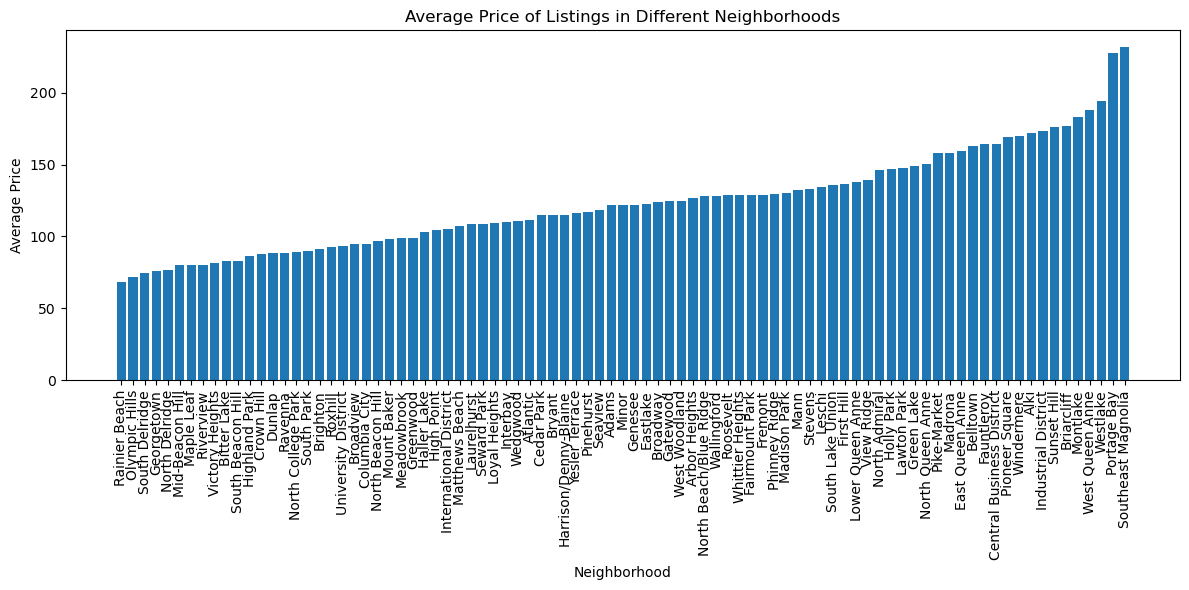

In [11]:
average_price_neighborhood = listings_df.groupby("neighbourhood_cleansed")["price"].mean()
sorted_neighborhoods = average_price_neighborhood.sort_values()

# Plotting the average prices
plt.figure(figsize=(12, 6))
plt.bar(sorted_neighborhoods.index, sorted_neighborhoods.values)
plt.xticks(rotation=90)
plt.xlabel("Neighborhood")
plt.ylabel("Average Price")
plt.title("Average Price of Listings in Different Neighborhoods")
plt.tight_layout()
plt.show()

The diagram above reveals a significant influence of the neighborhood on Airbnb listing prices, showcasing a wide price range spanning from $75 to over $200. It is evident that the location plays a crucial role in determining the prices of listings.

Notably, neighborhoods such as Rainier Beach and Olympic Hills, situated on the southern outskirts of Seattle and away from the bustling city center, tend to offer more affordable accommodations. These areas provide an opportunity for budget-conscious travelers to find reasonably priced options while still enjoying their stay in Seattle.

In contrast, neighborhoods like Portage Bay and Southeast Magnolia, centrally located in Seattle, command higher prices. These sought-after neighborhoods, known for their prime locations and proximity to popular attractions, draw greater demand, leading to increased listing prices.

By recognizing the impact of neighborhoods on Airbnb prices, travelers can make informed decisions based on their budget and preferences. Whether seeking affordability or a prime city experience, understanding the pricing dynamics across different neighborhoods enables visitors to find the perfect accommodation in Seattle.

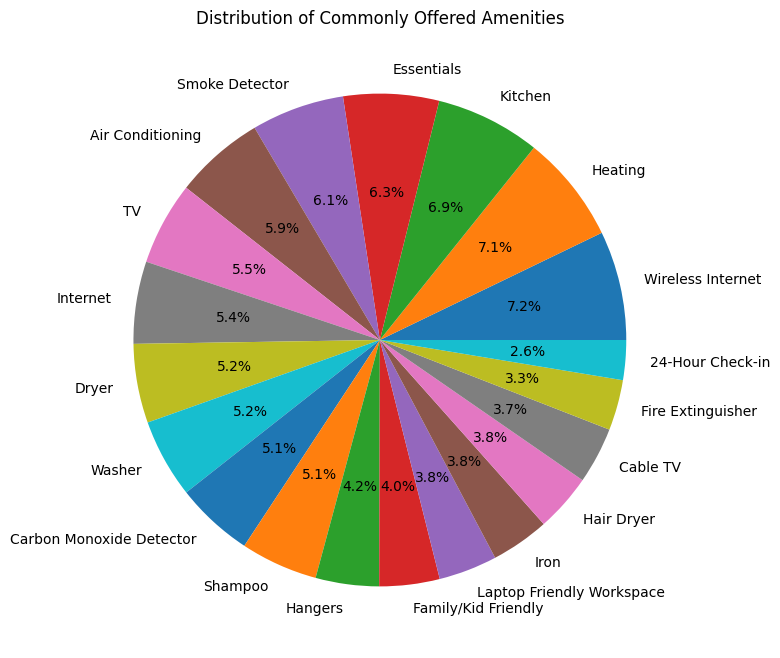

In [42]:
amenities_list = listings_df['amenities'].tolist()
all_amenities = [amenity.strip('"') for amenities in amenities_list for amenity in amenities.strip('{}').split(',')]
from collections import Counter
amenities_count = Counter(all_amenities)
amenities_count
common_amenities = sorted(amenities_count.items(), key=lambda x: x[1], reverse=True)
common_amenities
# Extract the top 10 amenities and their frequencies
top_amenities = common_amenities[:20]
amenities, counts = zip(*top_amenities)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=amenities, autopct='%1.1f%%')
plt.title('Distribution of Commonly Offered Amenities')

# Display the chart
plt.show()

The image above clearly illustrates that amenities such as WiFi, heating, kitchen, and essentials are the most commonly provided features in Airbnb listings. These amenities are considered essential for a comfortable and convenient stay.

Having WiFi access is almost a standard offering in modern accommodations, allowing guests to stay connected and browse the internet. Heating is crucial, especially during colder seasons, to ensure a cozy and warm environment for guests. A well-equipped kitchen enables visitors to prepare their meals, providing flexibility and cost-saving options compared to dining out. Essential amenities, which may include items like towels, toiletries, and bed linens, are essential for a hassle-free stay, eliminating the need for guests to bring these items themselves.

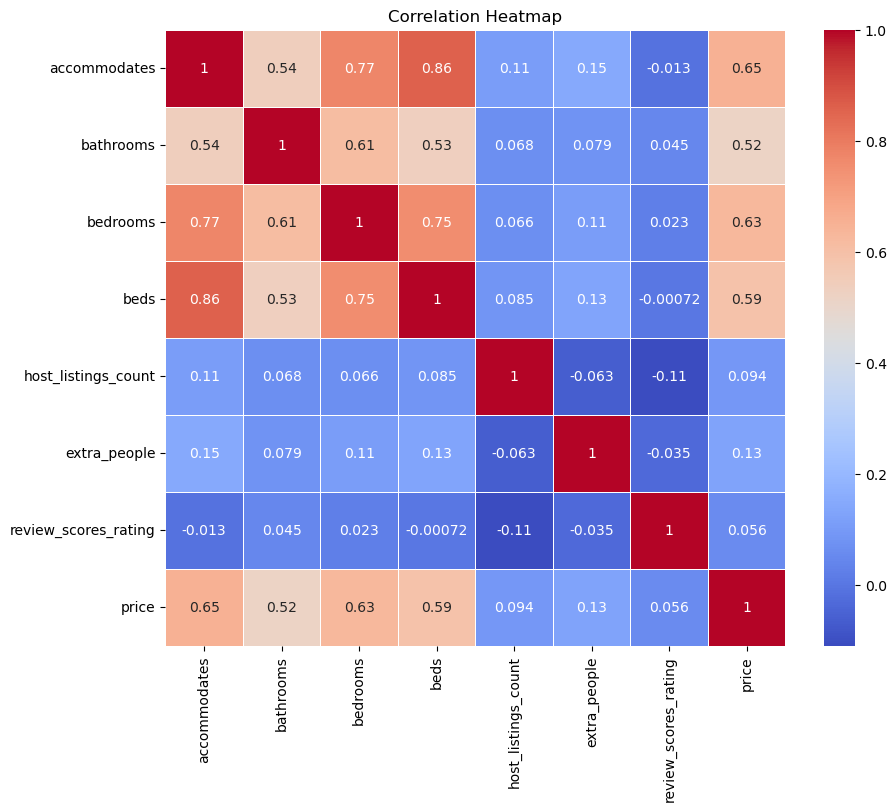

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the desired columns from the DataFrame
selected_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'host_listings_count', 'extra_people', 'review_scores_rating', 'price']
selected_df = listings_df[selected_cols]

# Compute the correlation matrix
corr_matrix = selected_df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()


The correlation matrix above reveals valuable insights into the factors that have a significant impact on the price of Airbnb listings. Among the features analyzed, the number of people the accommodation can accommodate, the number of bathrooms, beds, and bedrooms exhibit the strongest correlations with the price.

- Accommodation Capacity: The number of people that an Airbnb listing can accommodate has a direct correlation with the price. It is expected that larger accommodations capable of hosting more guests would generally command a higher price due to the increased capacity and potential for more amenities.

- Bathrooms: The number of bathrooms in an Airbnb listing is another important factor influencing the price. More bathrooms are typically associated with increased convenience and privacy, which can contribute to a higher price point.

- Beds and Bedrooms: The number of beds and bedrooms also play a significant role in determining the price of an Airbnb listing. Larger accommodations with multiple bedrooms and beds offer more space and flexibility, attracting higher prices.

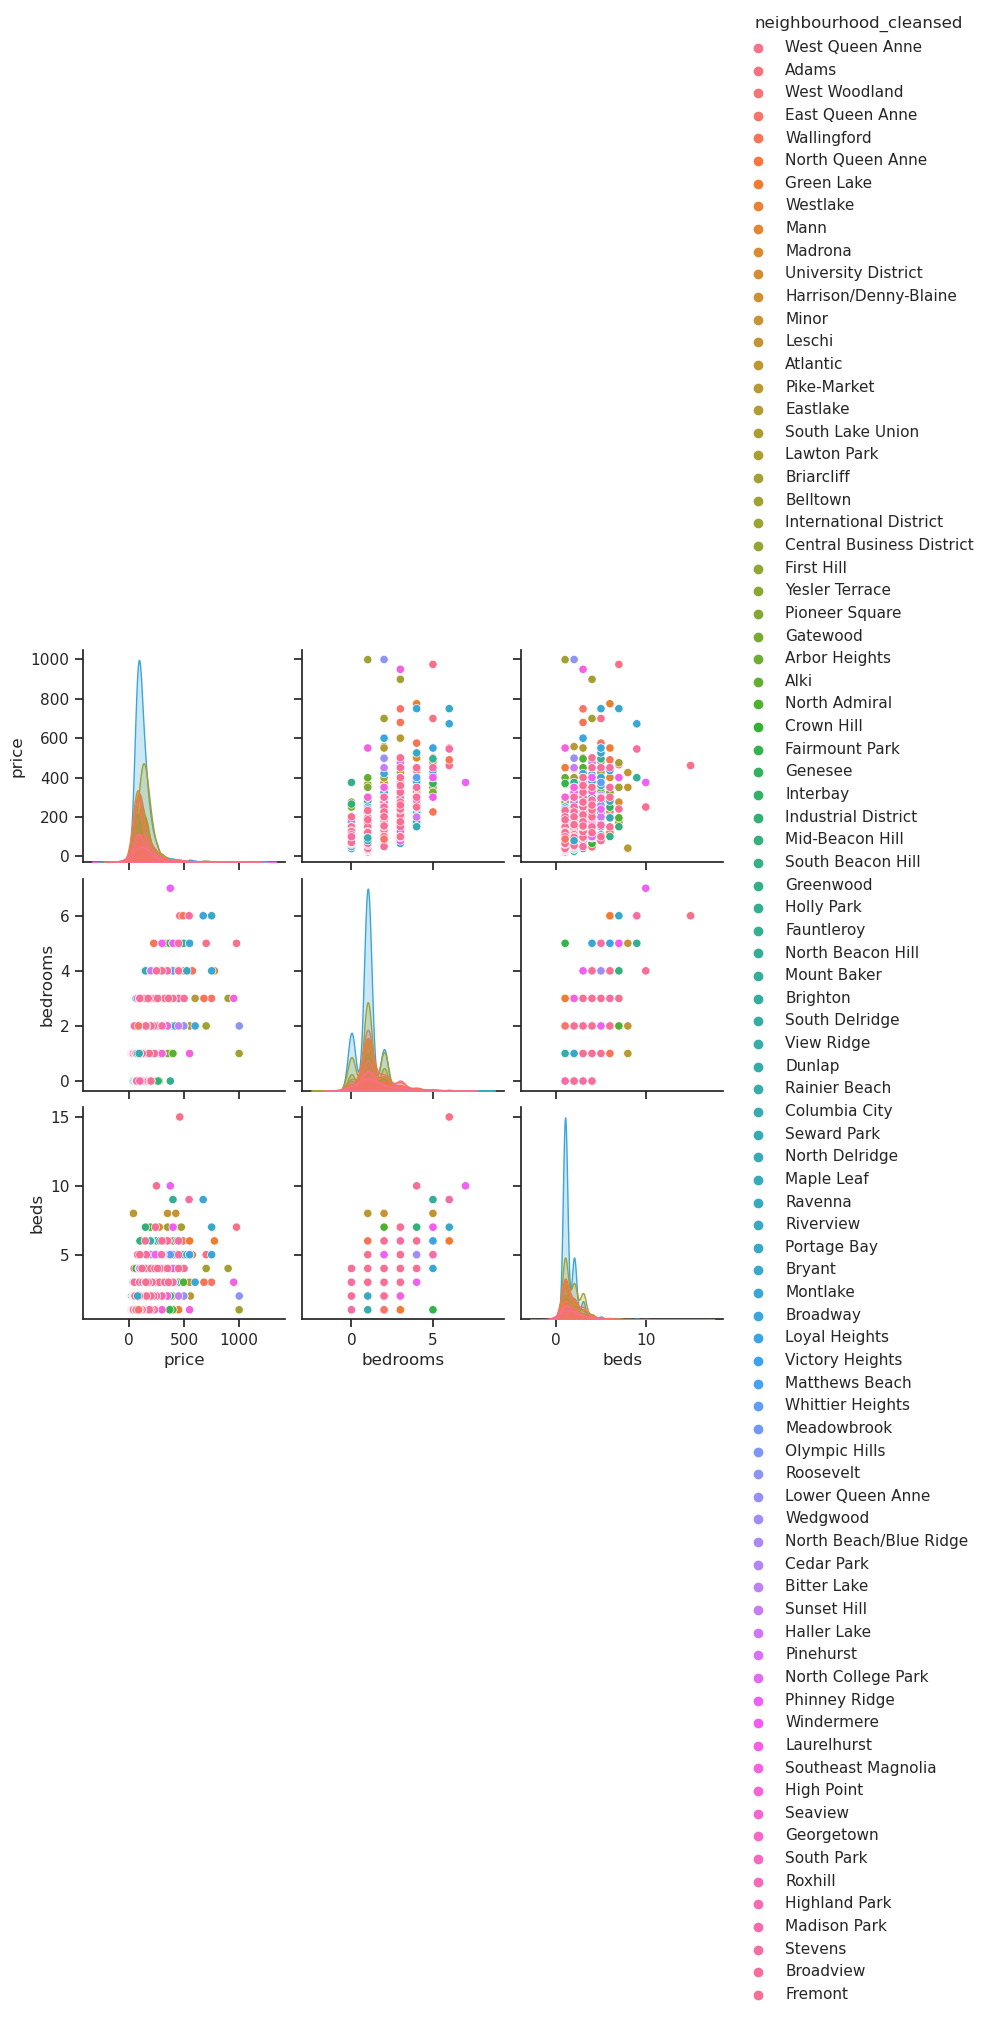

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the variables for the scatter plot matrix
variables = ['price', 'neighbourhood_cleansed', 'bedrooms', 'beds', 'bed_type']

# Create a subset DataFrame with the selected variables
subset_df = listings_df[variables]

# Create the scatter plot matrix
sns.set(style="ticks")
sns.pairplot(subset_df, hue="neighbourhood_cleansed")

# Rotate x-axis labels if needed
plt.xticks(rotation=45)

# Display the plot
plt.show()

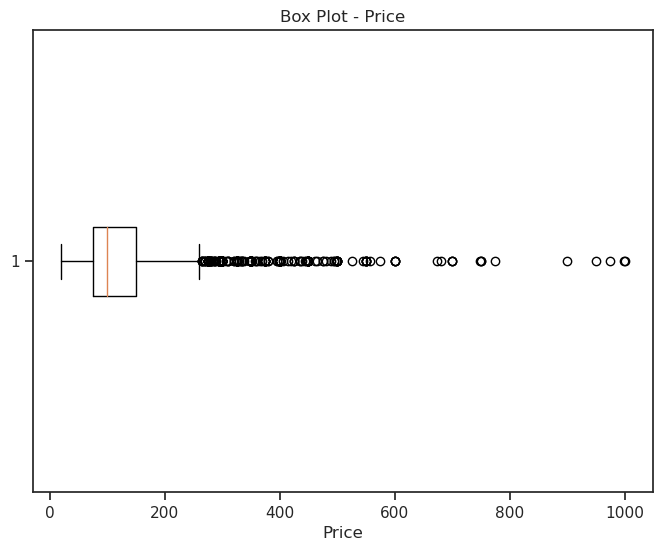

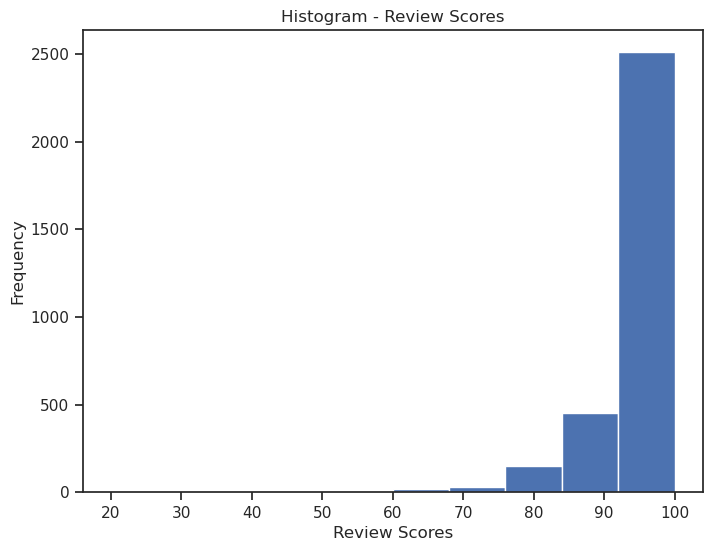

In [15]:
# Select the variables of interest
price_data = listings_df['price']
review_scores_data = listings_df['review_scores_rating']

# Create a box plot for prices
plt.figure(figsize=(8, 6))
plt.boxplot(price_data, vert=False)
plt.xlabel('Price')
plt.title('Box Plot - Price')
plt.show()

# Create a histogram for review scores
plt.figure(figsize=(8, 6))
plt.hist(review_scores_data, bins=10)
plt.xlabel('Review Scores')
plt.ylabel('Frequency')
plt.title('Histogram - Review Scores')
plt.show()

array([[<Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'accommodates'}>],
       [<Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'beds'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'cleaning_fee'}>,
        <Axes: title={'center': 'security_deposit'}>],
       [<Axes: title={'center': 'extra_people'}>,
        <Axes: title={'center': 'review_scores_rating'}>, <Axes: >]],
      dtype=object)

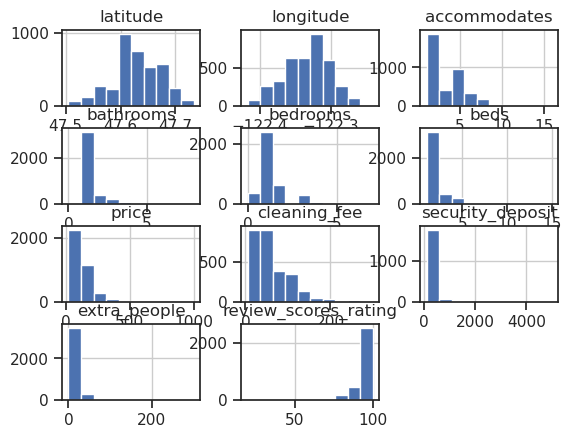

In [16]:
# Select the desired columns from the DataFrame
selected_cols =['latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'neighbourhood_cleansed', 'cleaning_fee', 'security_deposit', 'host_is_superhost','extra_people','review_scores_rating']
selected_df1 = listings_df[selected_cols]

selected_df1.hist()

/tmp/ipykernel_32/4249448569.py:6: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



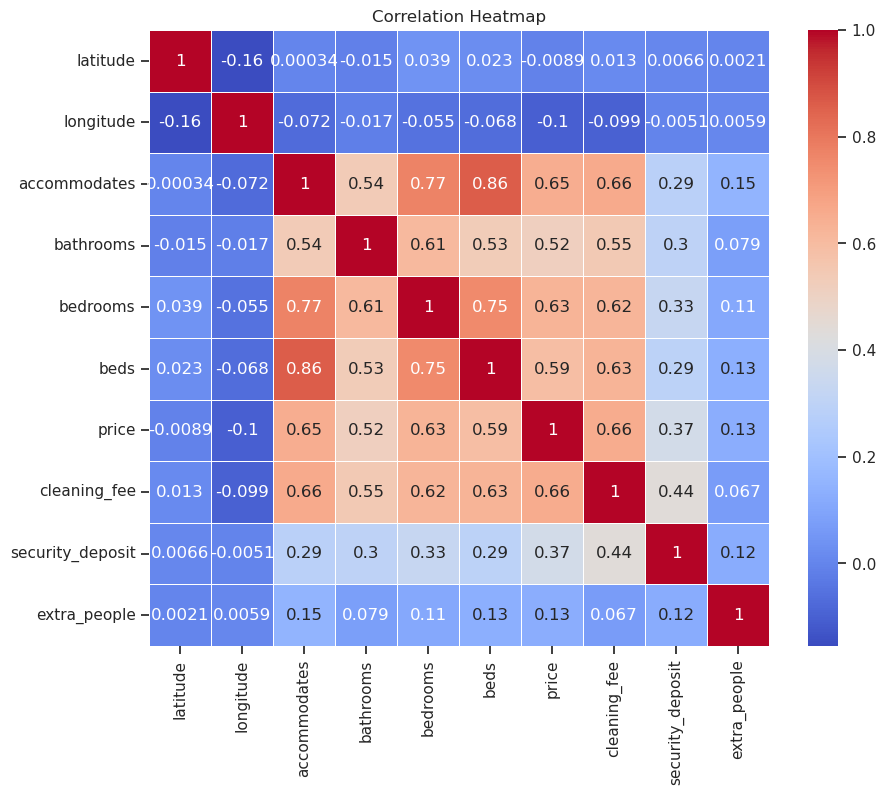

In [17]:
selected_cols =['latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'price', 'neighbourhood_cleansed', 'cleaning_fee', 'security_deposit', 'host_is_superhost','extra_people']

selected_df = listings_df[selected_cols]

# Compute the correlation matrix
corr_matrix = selected_df.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')

# Display the plot
plt.show()

### Machine Learning with Linear regression and XGBoost

In [90]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Select the columns of interest from the listings_df DataFrame
selected_cols = ['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                 'price', 'security_deposit', 'host_is_superhost',
                 'extra_people']
selected_df = listings_df[selected_cols]

# Drop rows with missing values
selected_df = selected_df.dropna()

# Separate categorical and numerical features
categorical_cols = ['room_type', 'bed_type', 'host_is_superhost']
numerical_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'extra_people','price']

# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(selected_df[categorical_cols])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols), index=selected_df.index)

# Concatenate the encoded columns with the numerical columns
preprocessed_df = pd.concat([encoded_df, selected_df[numerical_cols]], axis=1)

# Verify if 'price' column is present

# Split the data into features (X) and target variable (y)
X = preprocessed_df.drop('price', axis=1)
y = preprocessed_df['price']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model1.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 4621.578773729351
R-squared Score: 0.5614665454404073


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



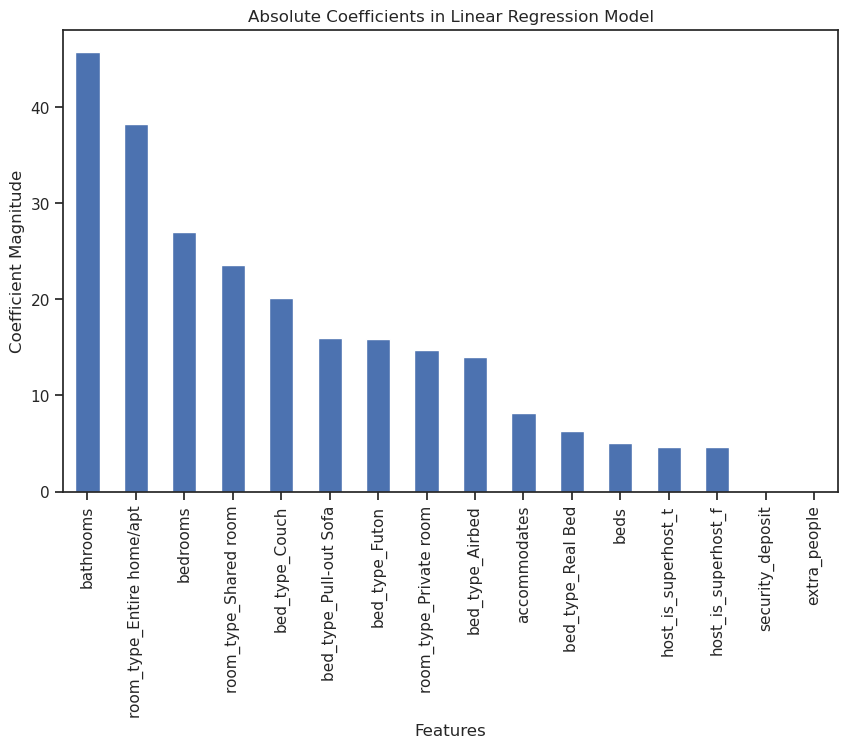

In [91]:
# Get the absolute values of the coefficients
coefficients = pd.Series(model1.coef_, index=X.columns).abs()

# Sort the coefficients in descending order
sorted_coefficients = coefficients.sort_values(ascending=False)

# Plot the sorted coefficients as a bar graph
plt.figure(figsize=(10, 6))
sorted_coefficients.plot(kind='bar')
plt.title("Absolute Coefficients in Linear Regression Model")
plt.xlabel("Features")
plt.ylabel("Coefficient Magnitude")
plt.xticks(rotation=90)
plt.show()


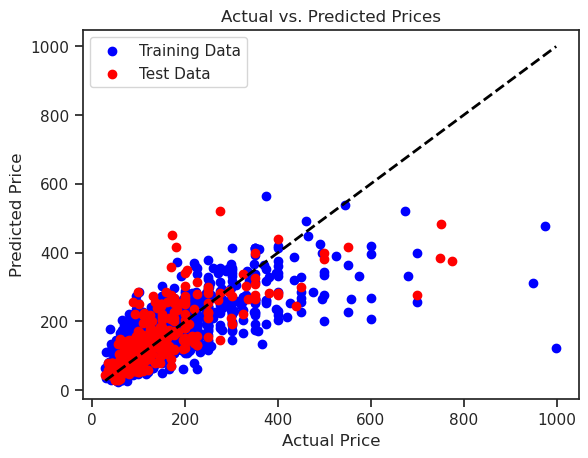

In [92]:
import matplotlib.pyplot as plt

# Plotting training set
plt.scatter(y_train, model1.predict(X_train), color='blue', label='Training Data')

# Plotting test set
plt.scatter(y_test, y_pred, color='red', label='Test Data')

# Plotting the line of best fit
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='black', linestyle='--', linewidth=2)

# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')

# Set legend
plt.legend()

# Show the plot
plt.show()


In [94]:
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder

# Select the columns of interest from the listings_df DataFrame
selected_cols = ['room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
                 'price', 'security_deposit', 'host_is_superhost',
                 'extra_people']
selected_df = listings_df[selected_cols]

# Drop rows with missing values
selected_df = selected_df.dropna()

# Separate categorical and numerical features
categorical_cols = ['room_type', 'bed_type', 'host_is_superhost']
numerical_cols = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'security_deposit', 'extra_people','price']

# One-hot encode the categorical columns
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore')
encoded_cols = encoder.fit_transform(selected_df[categorical_cols])

# Create a DataFrame with the encoded columns
encoded_df = pd.DataFrame(encoded_cols, columns=encoder.get_feature_names_out(categorical_cols), index=selected_df.index)

# Concatenate the encoded columns with the numerical columns
preprocessed_df = pd.concat([encoded_df, selected_df[numerical_cols]], axis=1)

# Verify if 'price' column is present

# Split the data into features (X) and target variable (y)
X = preprocessed_df.drop('price', axis=1)
y = preprocessed_df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)



Mean Squared Error: 5681.900190338678
R-squared Score: 0.46085451727108295


/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



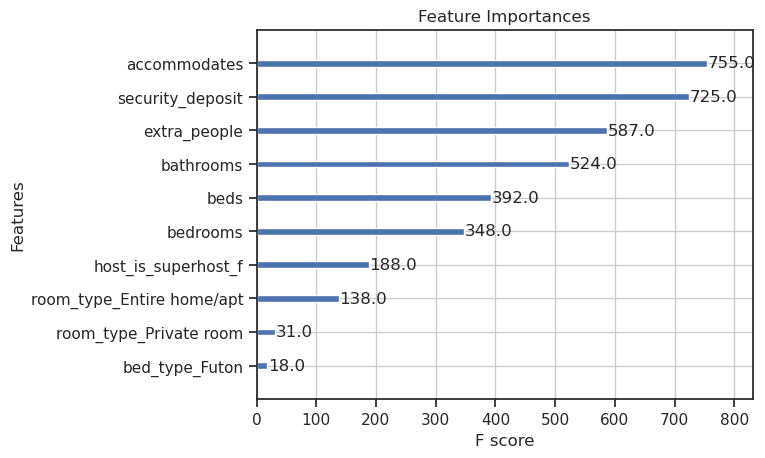

In [95]:
# Plot feature importances
xgb.plot_importance(model, max_num_features=10)
plt.title("Feature Importances")
plt.show()

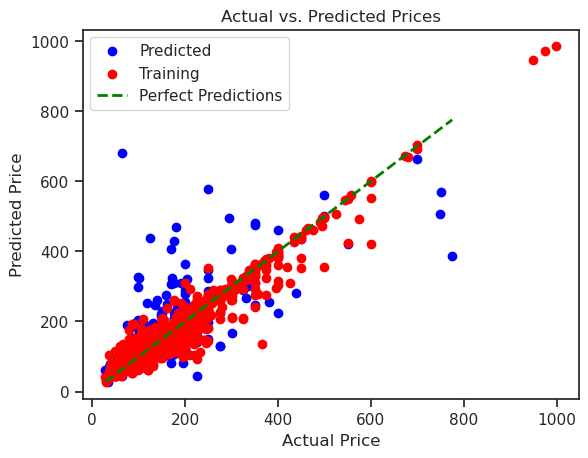

In [102]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted prices
plt.scatter(y_test, y_pred, color='blue', label='Predicted')
plt.scatter(y_train, model.predict(X_train), color='red', label='Training')

# Plotting the line of perfect predictions
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='green', linestyle='--', linewidth=2, label='Perfect Predictions')

# Set labels and title
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Prices')

# Set legend
plt.legend()

# Show the plot
plt.show()


#### Conclusions and learnings from the model

After evaluating the performance of two different models, linear regression and XGBoost, we obtained insights into the important criteria for predicting Airbnb prices.

1. Linear Regression:
   - Mean Squared Error: 4621.578773729351
   - R-squared Score: 0.5614665454404073
   
   The linear regression model identified the number of bedrooms, bathrooms, and the room type (specifically, an entire house/apartment) as the most important factors for predicting the price. These features had the strongest influence on the model's ability to estimate the price accurately.

2. XGBoost:
   - Mean Squared Error: 5681.900190338678
   - R-squared Score: 0.46085451727108295
   
   On the other hand, the XGBoost model considered different criteria as the most important for price prediction. It found that the number of people the accommodation can accommodate ('accommodates'), the security deposit, and the additional cost for extra people ('extra_people') were the key features in building an effective model to predict the price.

These findings highlight the different approaches and feature importance between linear regression and XGBoost. Linear regression focused more on the physical attributes of the accommodation, such as the number of bedrooms and bathrooms, while XGBoost considered factors related to capacity and additional costs.

Both models provide valuable insights into the factors that contribute to Airbnb pricing. Hosts can consider these factors when determining the appropriate price for their listings. Potential guests can also use these findings to understand the key features that impact the price and make informed decisions when searching for accommodations.

It's worth noting that the performance of the models can be further improved by considering additional features, such as location, amenities, and other contextual factors. Further exploration and fine-tuning of the models may lead to even more accurate predictions of Airbnb prices.